# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
# Эта команда позволяет вывыводить результаты друг за другом без вызова print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [4]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df = df.dropna()
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
10,56,F,<100,165,0.0,0.0,61189.99,70000.0,1524.5800,341,...,44360.86,61189.99,43218.413333,0.0,0.0,0.0,0.617406,1323.992698,0.226536,8009.940315
29,53,F,1M+,50,0.0,0.0,0.00,0.0,0.0000,15,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,6615.296000,0.520754,28503.869696
242,41,М,Mega,94,0.0,0.0,0.00,900000.0,16205.0300,3,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,6280.000000,0.945827,14333.600182
385,57,М,Mega,167,0.0,0.0,0.00,0.0,440095.3474,183,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,2693.479344,0.009221,30007.498843
416,62,F,<100,16,0.0,0.0,0.00,0.0,320237.7500,4,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,25417.080000,0.396904,34956.302433


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 10 to 49952
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1642 non-null   int64  
 1   gender               1642 non-null   object 
 2   city_type            1642 non-null   object 
 3   full_mob             1642 non-null   int64  
 4   ml_balance           1642 non-null   float64
 5   cl_balance_0m        1642 non-null   float64
 6   loan_balance_0m      1642 non-null   float64
 7   td_balance_0m        1642 non-null   float64
 8   casa_balance_0m      1642 non-null   float64
 9   dc_trx_cnt           1642 non-null   int64  
 10  dc_trx_sum           1642 non-null   float64
 11  income               1642 non-null   float64
 12  min_casa_balance_1q  1642 non-null   float64
 13  max_casa_balance_1q  1642 non-null   float64
 14  avg_casa_balance_1Y  1642 non-null   float64
 15  min_td_balance_1q    1642 non-null  

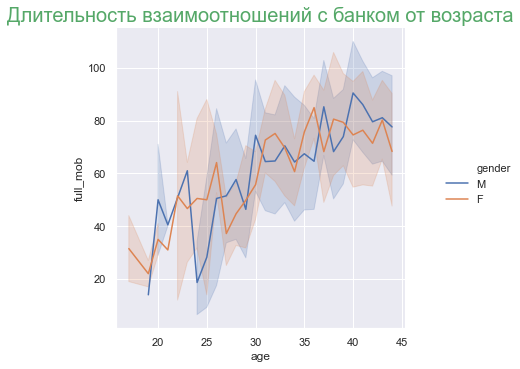

In [6]:
sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='full_mob', 
    hue='gender',
    data=df.query("age < 45"), 
    kind='line'
)
plt.title('Длительность взаимоотношений с банком от возраста', size=20, color='g');

In [37]:
city_type = df['city_type'].unique()

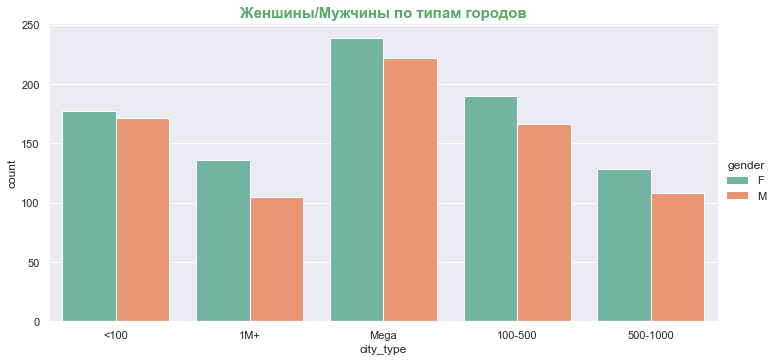

In [48]:
sns.catplot(
    x='city_type', 
    data=df, 
    kind='count', 
    hue='gender',  
    palette="Set2", 
    order=city_type, 
    height=5, 
    aspect=2);
plt.title('Женшины/Мужчины по типам городов', size=15, color='g', weight='bold');

In [54]:
balance = pd.Series(df.casa_balance_0m.unique())

In [55]:
balance

0       1.524580e+03
1       0.000000e+00
2       1.620503e+04
3       4.400953e+05
4       3.202378e+05
            ...     
1570    1.780180e+07
1571    3.369764e+06
1572    8.522300e+02
1573    8.399308e+05
1574    2.987885e+04
Length: 1575, dtype: float64